In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# Step 1: Load dataset
df = pd.read_csv("breast-cancer.csv")
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [3]:
X = df.drop(['id', 'diagnosis'], axis=1).values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["diagnosis"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [4]:
# SVM with linear and RBF kernels
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train, y_train)

SVC(C=1)

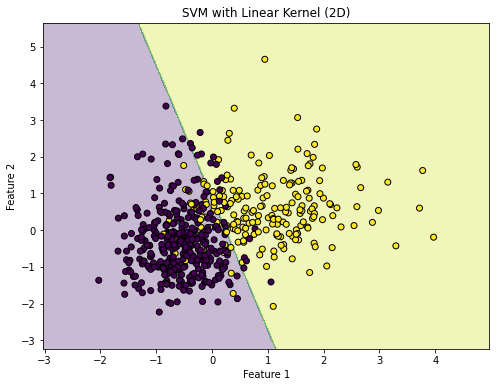

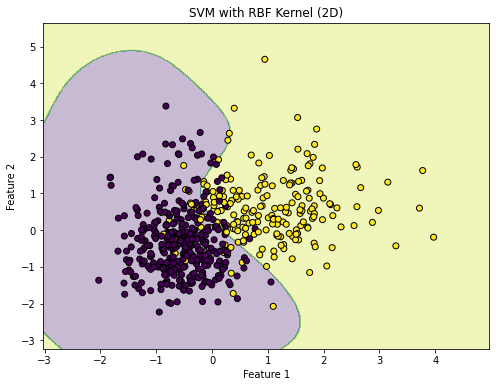

In [5]:
# Visualize decision boundary using only 2 features
def plot_decision_boundary(model, X, y, title):
    X_vis = X[:, :2]
    h = 0.02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train new models for 2D visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

svc_linear_2d = SVC(kernel='linear', C=1)
svc_linear_2d.fit(X_train_vis, y_train_vis)

svc_rbf_2d = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf_2d.fit(X_train_vis, y_train_vis)

plot_decision_boundary(svc_linear_2d, X_vis, y, "SVM with Linear Kernel (2D)")
plot_decision_boundary(svc_rbf_2d, X_vis, y, "SVM with RBF Kernel (2D)")

In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale'}


In [7]:
# Cross-validation
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean accuracy: 0.9736376339077782
